In [ ]:
!git clone https://gitlab.com/BDAg/identificador-de-soja.git

Cloning into 'identificador-de-soja'...
remote: Enumerating objects: 855, done.
remote: Total 855 (delta 0), reused 0 (delta 0), pack-reused 855
Receiving objects: 100% (855/855), 80.72 MiB | 21.84 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import os

import numpy as np
import pandas as pd
import cv2
from math import sqrt
import seaborn as sn

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score, mean_squared_error

In [ ]:
def load_images_from_folder(folder):
  images = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      images.append(img)
  return images

In [ ]:
plant_images = load_images_from_folder('./identificador-de-soja/classificacoes/planta')
not_plant_images = load_images_from_folder('./identificador-de-soja/classificacoes/naoplanta')

In [ ]:
appended_images = []

# não planta = 0
# planta = 1

for image in not_plant_images:
  appended_images.append([image.flatten(), 0])

for image in plant_images:
  appended_images.append([image.flatten(), 1])

In [ ]:
images_data_frame = pd.DataFrame(appended_images, columns=["imagem", "planta"])

In [ ]:
transformed_images = images_data_frame['imagem'].tolist()

scaler = StandardScaler()
scaler.fit(transformed_images)

scaled_features = scaler.transform(transformed_images)

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(scaled_features, images_data_frame['planta'])
dummy_clf.predict(scaled_features)
dummy_score = dummy_clf.score(scaled_features, images_data_frame['planta'])
dummy_score

0.5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, images_data_frame['planta'], test_size=0.3, random_state=0)

In [ ]:
clf = MLPClassifier(solver='sgd', activation='relu', hidden_layer_sizes=(15,), random_state=1, verbose=2)
clf.fit(X_train, y_train)

Iteration 1, loss = 0.90925442
Iteration 2, loss = 0.71281669
Iteration 3, loss = 0.52784433
Iteration 4, loss = 0.42973292
Iteration 5, loss = 0.37513935
Iteration 6, loss = 0.34797195
Iteration 7, loss = 0.32760432
Iteration 8, loss = 0.30489661
Iteration 9, loss = 0.28112962
Iteration 10, loss = 0.25890304
Iteration 11, loss = 0.23934135
Iteration 12, loss = 0.22114135
Iteration 13, loss = 0.20789754
Iteration 14, loss = 0.19618632
Iteration 15, loss = 0.18463398
Iteration 16, loss = 0.17688378
Iteration 17, loss = 0.16897908
Iteration 18, loss = 0.16219317
Iteration 19, loss = 0.15622481
Iteration 20, loss = 0.15016415
Iteration 21, loss = 0.14507879
Iteration 22, loss = 0.14026565
Iteration 23, loss = 0.13605313
Iteration 24, loss = 0.13205366
Iteration 25, loss = 0.12832173
Iteration 26, loss = 0.12468773
Iteration 27, loss = 0.12134923
Iteration 28, loss = 0.11803540
Iteration 29, loss = 0.11525106
Iteration 30, loss = 0.11251863
Iteration 31, loss = 0.11004712
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
y_predicted = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        73
           1       0.86      0.97      0.91        68

    accuracy                           0.91       141
   macro avg       0.91      0.91      0.91       141
weighted avg       0.91      0.91      0.91       141



In [ ]:
print("Acurácia:", accuracy_score(y_predicted, y_test))
print("MSE:", mean_squared_error(y_predicted, y_test))
print("RMSE:", sqrt(mean_squared_error(y_predicted, y_test)))

Acurácia: 0.9078014184397163
MSE: 0.09219858156028368
RMSE: 0.3036421933135836


In [ ]:
 train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, cv=5)

Iteration 1, loss = 0.94418643
Iteration 2, loss = 0.72028712
Iteration 3, loss = 0.51607186
Iteration 4, loss = 0.36976028
Iteration 5, loss = 0.26968162
Iteration 6, loss = 0.19714094
Iteration 7, loss = 0.15046489
Iteration 8, loss = 0.11696238
Iteration 9, loss = 0.09382346
Iteration 10, loss = 0.07734608
Iteration 11, loss = 0.06452276
Iteration 12, loss = 0.05428693
Iteration 13, loss = 0.04563450
Iteration 14, loss = 0.03867332
Iteration 15, loss = 0.03317795
Iteration 16, loss = 0.02898648
Iteration 17, loss = 0.02553164
Iteration 18, loss = 0.02267362
Iteration 19, loss = 0.02028876
Iteration 20, loss = 0.01829158
Iteration 21, loss = 0.01662034
Iteration 22, loss = 0.01522772
Iteration 23, loss = 0.01404816
Iteration 24, loss = 0.01303486
Iteration 25, loss = 0.01215913
Iteration 26, loss = 0.01139785
Iteration 27, loss = 0.01073453
Iteration 28, loss = 0.01015277
Iteration 29, loss = 0.00964128
Iteration 30, loss = 0.00918657
Iteration 31, loss = 0.00879264
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.96225855
Iteration 2, loss = 0.78814700
Iteration 3, loss = 0.60964032
Iteration 4, loss = 0.46420534
Iteration 5, loss = 0.34614420
Iteration 6, loss = 0.26042153
Iteration 7, loss = 0.19989815
Iteration 8, loss = 0.16100620
Iteration 9, loss = 0.13114576
Iteration 10, loss = 0.10831160
Iteration 11, loss = 0.09061385
Iteration 12, loss = 0.07684196
Iteration 13, loss = 0.06584448
Iteration 14, loss = 0.05701240
Iteration 15, loss = 0.04992800
Iteration 16, loss = 0.04413091
Iteration 17, loss = 0.03929656
Iteration 18, loss = 0.03528865
Iteration 19, loss = 0.03187323
Iteration 20, loss = 0.02895659
Iteration 21, loss = 0.02643524
Iteration 22, loss = 0.02423926
Iteration 23, loss = 0.02232007
Iteration 24, loss = 0.02063262
Iteration 25, loss = 0.01915651
Iteration 26, loss = 0.01784628
Iteration 27, loss = 0.01664605
Iteration 28, loss = 0.01557971
Iteration 29, loss = 0.01462722
Iteration 30, loss = 0.01377698
Iteration 31, loss = 0.01301286
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 22, loss = 0.02423926
Iteration 23, loss = 0.02232007
Iteration 24, loss = 0.02063262
Iteration 25, loss = 0.01915651
Iteration 26, loss = 0.01784628
Iteration 27, loss = 0.01664605
Iteration 28, loss = 0.01557971
Iteration 29, loss = 0.01462722
Iteration 30, loss = 0.01377698
Iteration 31, loss = 0.01301286
Iteration 32, loss = 0.01232708
Iteration 33, loss = 0.01171038
Iteration 34, loss = 0.01115548
Iteration 35, loss = 0.01065475
Iteration 36, loss = 0.01020170
Iteration 37, loss = 0.00979092
Iteration 38, loss = 0.00941759
Iteration 39, loss = 0.00907753
Iteration 40, loss = 0.00876805
Iteration 41, loss = 0.00848751
Iteration 42, loss = 0.00823011
Iteration 43, loss = 0.00799339
Iteration 44, loss = 0.00777515
Iteration 45, loss = 0.00757541
Iteration 46, loss = 0.00739144
Iteration 47, loss = 0.00722055
Iteration 48, loss = 0.00706144
Iteration 49, loss = 0.00691296
Iteration 50, loss = 0.00677407
Iteration 51, loss = 0.00664386
Iteration 52, loss = 0.00652153
Iteratio

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 6, loss = 0.49589762
Iteration 7, loss = 0.48251475
Iteration 8, loss = 0.47865295
Iteration 9, loss = 0.47828104
Iteration 10, loss = 0.48427198
Iteration 11, loss = 0.48078132
Iteration 12, loss = 0.47050622
Iteration 13, loss = 0.46413149
Iteration 14, loss = 0.45036840
Iteration 15, loss = 0.41541562
Iteration 16, loss = 0.38731361
Iteration 17, loss = 0.35121645
Iteration 18, loss = 0.32470468
Iteration 19, loss = 0.30344393
Iteration 20, loss = 0.28392706
Iteration 21, loss = 0.26630688
Iteration 22, loss = 0.25289375
Iteration 23, loss = 0.24017230
Iteration 24, loss = 0.22397953
Iteration 25, loss = 0.21602499
Iteration 26, loss = 0.21006902
Iteration 27, loss = 0.20579295
Iteration 28, loss = 0.20057995
Iteration 29, loss = 0.19670895
Iteration 30, loss = 0.19957268
Iteration 31, loss = 0.21324174
Iteration 32, loss = 0.22368532
Iteration 33, loss = 0.22573483
Iteration 34, loss = 0.21579909
Iteration 35, loss = 0.20361035
Iteration 36, loss = 0.19003358
Iteration 37

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 31, loss = 0.01301286
Iteration 32, loss = 0.01232708
Iteration 33, loss = 0.01171038
Iteration 34, loss = 0.01115548
Iteration 35, loss = 0.01065475
Iteration 36, loss = 0.01020170
Iteration 37, loss = 0.00979092
Iteration 38, loss = 0.00941759
Iteration 39, loss = 0.00907753
Iteration 40, loss = 0.00876805
Iteration 41, loss = 0.00848751
Iteration 42, loss = 0.00823011
Iteration 43, loss = 0.00799339
Iteration 44, loss = 0.00777515
Iteration 45, loss = 0.00757541
Iteration 46, loss = 0.00739144
Iteration 47, loss = 0.00722055
Iteration 48, loss = 0.00706144
Iteration 49, loss = 0.00691296
Iteration 50, loss = 0.00677407
Iteration 51, loss = 0.00664386
Iteration 52, loss = 0.00652153
Iteration 53, loss = 0.00640634
Iteration 54, loss = 0.00629766
Iteration 55, loss = 0.00619490
Iteration 56, loss = 0.00609754
Iteration 57, loss = 0.00600513
Iteration 58, loss = 0.00591725
Iteration 59, loss = 0.00583352
Iteration 60, loss = 0.00575362
Iteration 61, loss = 0.00567723
Iterati

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
print(train_sizes)

[ 26  84 143 202 261]


In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

In [ ]:
print(train_scores_mean, valid_scores_mean)

[1.         1.         1.         0.97227723 1.        ] [0.78904429 0.84097902 0.85016317 0.83804196 0.89310023]


In [ ]:
cross_validation_score = cross_val_score(clf, X_train, y_train, cv=5)
cross_validation_score

Iteration 1, loss = 0.94848852
Iteration 2, loss = 0.72369460
Iteration 3, loss = 0.52481736
Iteration 4, loss = 0.41332004
Iteration 5, loss = 0.36539235
Iteration 6, loss = 0.33756422
Iteration 7, loss = 0.31196333
Iteration 8, loss = 0.28695756
Iteration 9, loss = 0.26161695
Iteration 10, loss = 0.23918033
Iteration 11, loss = 0.21693843
Iteration 12, loss = 0.19938476
Iteration 13, loss = 0.18450401
Iteration 14, loss = 0.17257620
Iteration 15, loss = 0.16214492
Iteration 16, loss = 0.15323445
Iteration 17, loss = 0.14522429
Iteration 18, loss = 0.13851984
Iteration 19, loss = 0.13250773
Iteration 20, loss = 0.12719928
Iteration 21, loss = 0.12337958
Iteration 22, loss = 0.11882056
Iteration 23, loss = 0.11454365
Iteration 24, loss = 0.11081344
Iteration 25, loss = 0.10727397
Iteration 26, loss = 0.10417259
Iteration 27, loss = 0.10119883
Iteration 28, loss = 0.09824099
Iteration 29, loss = 0.09606057
Iteration 30, loss = 0.09361470
Iteration 31, loss = 0.09145004
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.92475066
Iteration 2, loss = 0.71497230
Iteration 3, loss = 0.52366175
Iteration 4, loss = 0.41140050
Iteration 5, loss = 0.35918571
Iteration 6, loss = 0.32468129
Iteration 7, loss = 0.30028066
Iteration 8, loss = 0.27412145
Iteration 9, loss = 0.24909616
Iteration 10, loss = 0.22918813
Iteration 11, loss = 0.21067672
Iteration 12, loss = 0.19660162
Iteration 13, loss = 0.18461247
Iteration 14, loss = 0.17475989
Iteration 15, loss = 0.16620270
Iteration 16, loss = 0.15871831
Iteration 17, loss = 0.15128754
Iteration 18, loss = 0.14444887
Iteration 19, loss = 0.13873011
Iteration 20, loss = 0.13326049
Iteration 21, loss = 0.12910712
Iteration 22, loss = 0.12430286
Iteration 23, loss = 0.12003539
Iteration 24, loss = 0.11637964
Iteration 25, loss = 0.11279926
Iteration 26, loss = 0.10988779
Iteration 27, loss = 0.10672136
Iteration 28, loss = 0.10374590
Iteration 29, loss = 0.10126254
Iteration 30, loss = 0.09847146
Iteration 31, loss = 0.09604099
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 4, loss = 0.46473007
Iteration 5, loss = 0.39650155
Iteration 6, loss = 0.35754401
Iteration 7, loss = 0.33145646
Iteration 8, loss = 0.31097891
Iteration 9, loss = 0.29044960
Iteration 10, loss = 0.26913371
Iteration 11, loss = 0.25003659
Iteration 12, loss = 0.23094838
Iteration 13, loss = 0.21406931
Iteration 14, loss = 0.20072659
Iteration 15, loss = 0.18949823
Iteration 16, loss = 0.17899174
Iteration 17, loss = 0.17081239
Iteration 18, loss = 0.16376863
Iteration 19, loss = 0.15700222
Iteration 20, loss = 0.15038408
Iteration 21, loss = 0.14466994
Iteration 22, loss = 0.13959443
Iteration 23, loss = 0.13470512
Iteration 24, loss = 0.13095690
Iteration 25, loss = 0.12603465
Iteration 26, loss = 0.12147326
Iteration 27, loss = 0.11780853
Iteration 28, loss = 0.11479499
Iteration 29, loss = 0.11142909
Iteration 30, loss = 0.10853894
Iteration 31, loss = 0.10565151
Iteration 32, loss = 0.10327558
Iteration 33, loss = 0.10052730
Iteration 34, loss = 0.09821519
Iteration 35, 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 0.52778032
Iteration 4, loss = 0.40952937
Iteration 5, loss = 0.34466570
Iteration 6, loss = 0.30910721
Iteration 7, loss = 0.28291837
Iteration 8, loss = 0.26115144
Iteration 9, loss = 0.24076076
Iteration 10, loss = 0.22150674
Iteration 11, loss = 0.20489405
Iteration 12, loss = 0.18989672
Iteration 13, loss = 0.17611385
Iteration 14, loss = 0.16484508
Iteration 15, loss = 0.15602445
Iteration 16, loss = 0.14688894
Iteration 17, loss = 0.13989358
Iteration 18, loss = 0.13396886
Iteration 19, loss = 0.12860831
Iteration 20, loss = 0.12332375
Iteration 21, loss = 0.11852308
Iteration 22, loss = 0.11406103
Iteration 23, loss = 0.11020626
Iteration 24, loss = 0.10704050
Iteration 25, loss = 0.10343142
Iteration 26, loss = 0.09989294
Iteration 27, loss = 0.09700581
Iteration 28, loss = 0.09426908
Iteration 29, loss = 0.09125423
Iteration 30, loss = 0.08876276
Iteration 31, loss = 0.08620676
Iteration 32, loss = 0.08418822
Iteration 33, loss = 0.08189811
Iteration 34, l

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.84848485, 0.89393939, 0.92307692, 0.86153846, 0.92307692])

In [ ]:
np.mean(cross_validation_score)

0.89002331002331

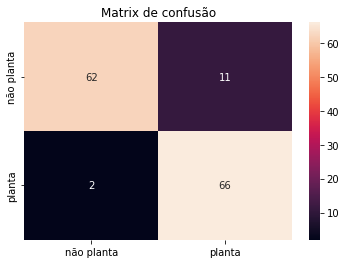

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_predicted), index = ['não planta', 'planta'], columns = ['não planta', 'planta'])
# plt.figure(figsize = (10,7))
plt.title('Matrix de confusão')
sn.heatmap(df_cm, annot=True)
plt.show()

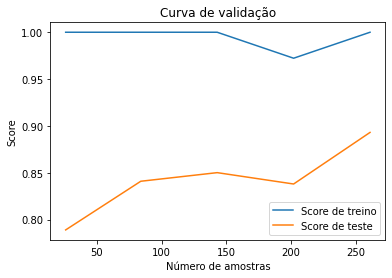

In [ ]:
# Quanto mais perto a linha amarela da azul melhor, pois se refere a quantidade ideal de amostras para a validação do algoritimo ou seja, é necessário uma maior quantidade de amostras para melhorar a validação
plt.plot(train_sizes, train_scores_mean, label='Score de treino')
plt.plot(train_sizes, valid_scores_mean, label='Score de teste')
plt.legend(loc='best')
plt.xlabel('Número de amostras')
plt.ylabel('Score')
plt.title('Curva de aprendizado')
plt.show()

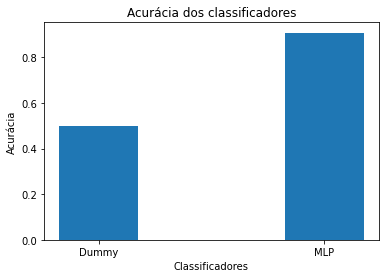

<Figure size 720x504 with 0 Axes>

In [ ]:
labels = ['Dummy', 'MLP']
classifiers = [dummy_score, accuracy_score(y_predicted, y_test)]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, classifiers, width)

ax.set_ylabel('Acurácia')
ax.set_xlabel('Classificadores')
ax.set_title('Acurácia dos classificadores')
plt.figure(figsize = (10,7))

plt.show()

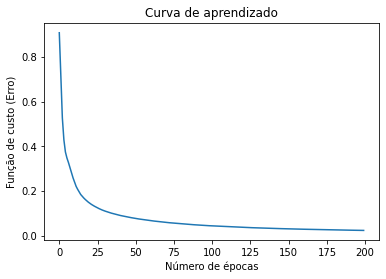

<Figure size 720x504 with 0 Axes>

In [ ]:
plt.plot(clf.loss_curve_)
plt.xlabel('Número de épocas')
plt.ylabel('Função de custo (Erro)')
plt.title('Curva de erro')
plt.figure(figsize = (10,7))
plt.show()

In [ ]:
clf.loss_curve_

[0.9092544248039895,
 0.7128166872991151,
 0.5278443275491973,
 0.42973292187162015,
 0.3751393469922838,
 0.3479719490043477,
 0.32760432396652833,
 0.3048966111774667,
 0.28112962257433655,
 0.25890303576709073,
 0.23934134700426968,
 0.22114134706250907,
 0.2078975444347555,
 0.19618632067111028,
 0.18463398173960408,
 0.1768837770028186,
 0.16897907979898724,
 0.16219317184364068,
 0.15622481176252806,
 0.15016414835805333,
 0.1450787858529113,
 0.14026564985754933,
 0.13605313196938967,
 0.13205365534557936,
 0.12832172881365922,
 0.12468772992556122,
 0.12134923416422833,
 0.11803539641795832,
 0.1152510630718047,
 0.1125186299089189,
 0.11004712329894605,
 0.10776325780106875,
 0.10531565160629903,
 0.10319642929905973,
 0.10117725045538634,
 0.09936367377163804,
 0.09724350404271673,
 0.09535293186795656,
 0.09372045724296008,
 0.09217770697919594,
 0.0904772670536161,
 0.089030700870842,
 0.08759554694735294,
 0.08607300633762412,
 0.08462939723759362,
 0.0834232642608558,
 0.